# Hourly Energy Consumption Exploratory Data Analysis

In this project, I explored hourly electricity usage data collected over several years. Using Python libraries such as Pandas, NumPy, and Matplotlib, I handled the data cleaning, visualization, and exploration of key patterns in energy demand across time.

## Objectives:
- Clean and prepare time-series data
- Explore energy usage trends across different timescales (hourly, daily, monthly, yearly)
- Visualize patterns to uncover useful insights (e.g., peak hours, seasonal variations)

In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

AEP = pd.read_csv("AEP_hourly.csv")
AEP

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [129]:
AEP.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [130]:
AEP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [131]:
AEP.columns

Index(['Datetime', 'AEP_MW'], dtype='object')

---
## Data Cleaning

In this section, I:
- Converted the `Datetime` column to datetime format
- Set the datetime as the index for time-series operations
- Dropped duplicates and handled missing values

In [132]:
AEP["Datetime"] = pd.to_datetime(AEP["Datetime"])
AEP.set_index("Datetime", inplace=True)

In [133]:
AEP

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [134]:
AEP.duplicated().sum()

np.int64(108630)

In [135]:
AEP = AEP.drop_duplicates()
AEP

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-03 08:00:00,22759.0
2018-01-02 08:00:00,22685.0
2018-01-02 11:00:00,21995.0


---
## Data Aggregation

I aggregated energy usage into:
- Daily average
- Monthly average
- Yearly average

In [136]:
daily_avg = AEP.resample('D').mean()

In [137]:
daily_avg.isnull().sum()


AEP_MW    2755
dtype: int64

In [138]:
daily_avg = daily_avg.dropna()
daily_avg


,AEP_MW
Datetime,
2004-10-01,13758.000000
2004-10-02,12869.157895
2004-10-03,12104.045455
2004-10-04,13898.375000
2004-10-05,14118.812500
...,...
2018-07-02,20811.000000
2018-07-03,21243.000000
2018-07-05,21320.000000


In [139]:
monthly_avg = AEP.resample('ME').mean()
monthly_avg.isnull().sum()


AEP_MW    5
dtype: int64

In [140]:
monthly_avg = monthly_avg.dropna()
monthly_avg

,AEP_MW
Datetime,
2004-10-31,13765.760070
2004-11-30,14706.203883
2004-12-31,16763.828530
2005-01-31,17965.126214
2005-02-28,17021.801762
...,...
2018-01-31,21884.086957
2018-04-30,9967.333333
2018-05-31,10078.600000


In [141]:
yearly_avg = AEP.resample('YE').mean()
yearly_avg

,AEP_MW
Datetime,
2004-12-31,15179.383962
2005-12-31,16173.410448
2006-12-31,16314.953981
2007-12-31,18903.000000
2008-12-31,19055.301205
2009-12-31,14522.488055
2010-12-31,17790.194915
2011-12-31,19153.435780
2012-12-31,15621.017241


---
## Feature Engineering

I created new time-based features such as:
- Hour of the day
- Day of the week
- Month and year
  
These helps me group and analyze energy usage by different timescales.

In [142]:
AEP

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-03 08:00:00,22759.0
2018-01-02 08:00:00,22685.0
2018-01-02 11:00:00,21995.0


In [144]:
AEP = AEP.copy()
AEP["hour"] = AEP.index.hour
AEP.head()

,AEP_MW,hour
Datetime,,
2004-12-31 01:00:00,13478.0,1
2004-12-31 02:00:00,12865.0,2
2004-12-31 03:00:00,12577.0,3
2004-12-31 04:00:00,12517.0,4
2004-12-31 05:00:00,12670.0,5


In [145]:
AEP["day_of_week"] = AEP.index.dayofweek
AEP.head()

,AEP_MW,hour,day_of_week
Datetime,,,
2004-12-31 01:00:00,13478.0,1,4
2004-12-31 02:00:00,12865.0,2,4
2004-12-31 03:00:00,12577.0,3,4
2004-12-31 04:00:00,12517.0,4,4
2004-12-31 05:00:00,12670.0,5,4


In [146]:
AEP["monthly"] = AEP.index.month
AEP.head()

,AEP_MW,hour,day_of_week,monthly
Datetime,,,,
2004-12-31 01:00:00,13478.0,1,4,12
2004-12-31 02:00:00,12865.0,2,4,12
2004-12-31 03:00:00,12577.0,3,4,12
2004-12-31 04:00:00,12517.0,4,4,12
2004-12-31 05:00:00,12670.0,5,4,12


In [147]:
AEP["year"] = AEP.index.year
AEP.head()

,AEP_MW,hour,day_of_week,monthly,year
Datetime,,,,,
2004-12-31 01:00:00,13478.0,1,4,12,2004
2004-12-31 02:00:00,12865.0,2,4,12,2004
2004-12-31 03:00:00,12577.0,3,4,12,2004
2004-12-31 04:00:00,12517.0,4,4,12,2004
2004-12-31 05:00:00,12670.0,5,4,12,2004


In [148]:
hourly_usage = AEP.groupby("hour")["AEP_MW"].mean()
hourly_usage

hour
0     15116.105413
1     13715.811494
2     12815.023050
3     12335.503135
4     12161.841880
5     12283.326501
6     13208.379074
7     14683.514440
8     16629.776091
9     17589.511777
10    17628.839080
11    17928.191630
12    18041.268980
13    18196.484581
14    18663.776908
15    18530.694346
16    18551.550347
17    18739.945392
18    19036.745234
19    19023.622673
20    18930.140741
21    18624.304854
22    18222.289417
23    16754.175610
Name: AEP_MW, dtype: float64

In [149]:
days_usage = AEP.groupby("day_of_week")["AEP_MW"].mean()
days_usage


day_of_week
0    17000.848485
1    17844.778087
2    17634.847636
3    17840.320879
4    17269.767361
5    14390.276291
6    13155.506404
Name: AEP_MW, dtype: float64

In [150]:
monthly_usage = AEP.groupby("monthly")["AEP_MW"].mean()
monthly_usage

monthly
1     19457.556948
2     19255.711111
3     16208.348993
4     12566.755208
5     12643.347407
6     16980.223069
7     18527.546483
8     19141.291191
9     14782.602637
10    13677.089393
11    14984.092892
12    17572.217605
Name: AEP_MW, dtype: float64

In [151]:
yearly_usage = AEP.groupby("year")["AEP_MW"].mean()
yearly_usage

year
2004    15179.383962
2005    16173.410448
2006    16314.953981
2007    18903.000000
2008    19055.301205
2009    14522.488055
2010    17790.194915
2011    19153.435780
2012    15621.017241
2013    14202.628931
2014    15068.768473
2015    14724.962264
2016    13461.099237
2017    11097.139241
2018    19517.666667
Name: AEP_MW, dtype: float64

In [152]:
AEP.describe()

,AEP_MW,hour,day_of_week,monthly,year
count,12643.000000,12643.000000,12643.000000,12643.000000,12643.000000
mean,16415.127027,11.385035,2.990667,7.610219,2006.555248
std,3748.575582,6.819431,2.044685,3.431905,2.800351
min,9581.000000,0.000000,0.000000,1.000000,2004.000000
25%,13205.500000,5.000000,1.000000,5.000000,2005.000000
50%,16366.000000,11.000000,3.000000,8.000000,2005.000000
75%,19528.500000,17.000000,5.000000,11.000000,2007.000000
max,25695.000000,23.000000,6.000000,12.000000,2018.000000


---
## Visualizations and Key Insights

I used various plots to uncover meaningful patterns in the data:


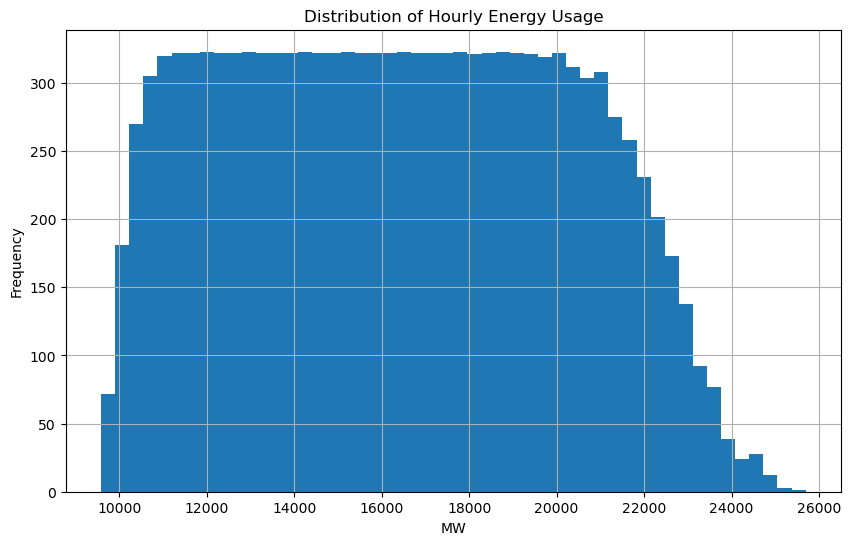

In [153]:
AEP["AEP_MW"].plot.hist(bins=50, figsize=(10, 6), title="Distribution of Hourly Energy Usage", grid=True);
plt.xlabel("MW");
plt.ylabel("Frequency");
plt.show();




##  Distribution of Hourly Energy Usage
This histogram shows the frequency distribution of hourly energy usage values. It helps us understand how energy usage is spread and whether it’s skewed, normal, or contains outliers.

### Observation

From the histogram of hourly energy usage:

- The majority of usage values fall between **10,000 MW and 22,000 MW**, where frequency remains fairly high and consistent.
- The distribution is **slightly right-skewed**, with a noticeable drop in frequency beyond **22,000 MW**.
- There are **few extreme high-usage events** between **24,000 MW and 26,000 MW**, suggesting rare demand surges.
- The most common energy usage range appears to be between **12,000 MW and 20,000 MW**, with each bin in that range occurring over **300 times**.
- This implies that the system generally operates within a stable band, but occasional spikes in demand might require extra load planning or backup supply strategies.
---

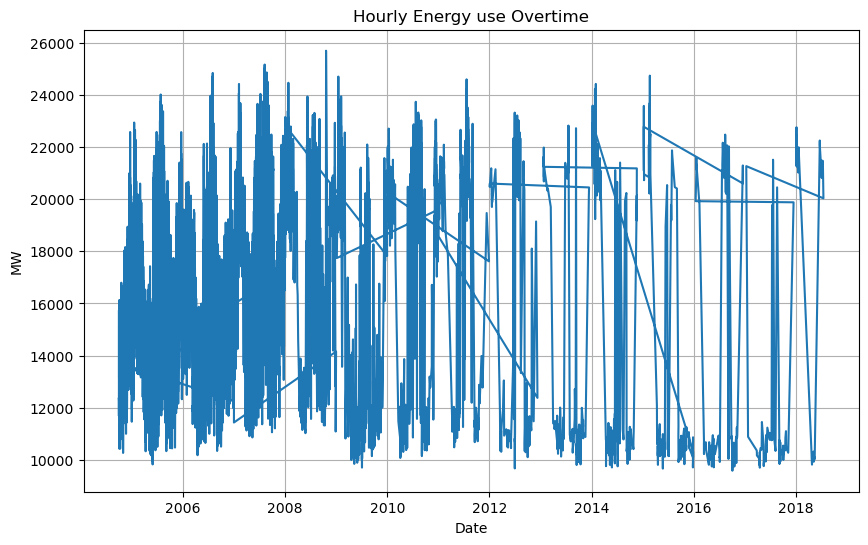

In [154]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(AEP.index, AEP["AEP_MW"])
ax.set(title="Hourly Energy use Overtime",
      xlabel="Date",
      ylabel="MW")
ax.grid(True)

## Hourly Energy Usage Over Time
This plot shows the energy consumption trend over the entire period covered in the dataset (2004 - 2018). It helps us observe seasonal patterns, peaks, and drops in hourly energy usage.

### Observation

Hourly Energy Use Over Time:

- **Seasonal and yearly fluctuations** are evident, with repeated peaks and valleys, suggesting regular cycles of high and low demand (e.g., seasonal temperature changes).
- The **majority of values range between 12,000 MW and 22,000 MW**, consistent with the earlier histogram.
- **Sharp spikes** reflect short-term demand surges, while **sudden drops or flatlines** may indicate:
  - Missing or corrupt data points,
  - Equipment downtimes,
  - Data recording issues.
- A noticeable increase in **data gaps and flat patterns after 2013** suggests less consistent or incomplete recording in later years.
---

In [155]:
hourly_usage
hourly_usage = pd.DataFrame(hourly_usage,
                           columns=["AEP_MW"])
hourly_usage

,AEP_MW
hour,
0,15116.105413
1,13715.811494
2,12815.023050
3,12335.503135
4,12161.841880
5,12283.326501
6,13208.379074
7,14683.514440
8,16629.776091


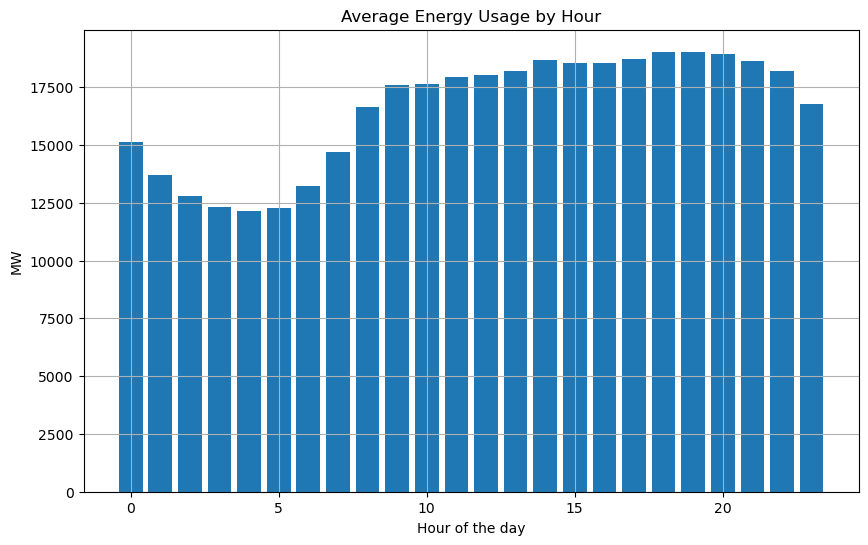

In [156]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(hourly_usage.index, hourly_usage["AEP_MW"]);
ax.set(title="Average Energy Usage by Hour",
      xlabel="Hour of the day",
      ylabel="MW")
ax.grid(True)

## Average Energy Usage by Hour of Day
This bar chart displays the average energy usage for each hour of the day. It helps identify peak usage periods (e.g., daytime hours) and low-demand times (e.g., midnight).

### Observation

Average Energy Usage by Hour:

- Energy usage is **lowest between 3 AM and 5 AM**, likely due to reduced residential and industrial activity during early morning hours.
- There is a **steady rise** in consumption starting from around **8 AM**, reflecting the start of daily operations.
- Energy usage peaks between **2 PM and 8 PM**, likely corresponding to sustained residential, commercial, and industrial demand.
- After 8 PM, energy usage gradually **declines**, tapering off through the late evening and early night.

This pattern aligns with typical human activity cycles, highlighting the importance of **time-of-day-aware energy management**.

---

In [157]:
days_usage = pd.DataFrame(days_usage, columns=["AEP_MW"])
days_usage

,AEP_MW
day_of_week,
0,17000.848485
1,17844.778087
2,17634.847636
3,17840.320879
4,17269.767361
5,14390.276291
6,13155.506404


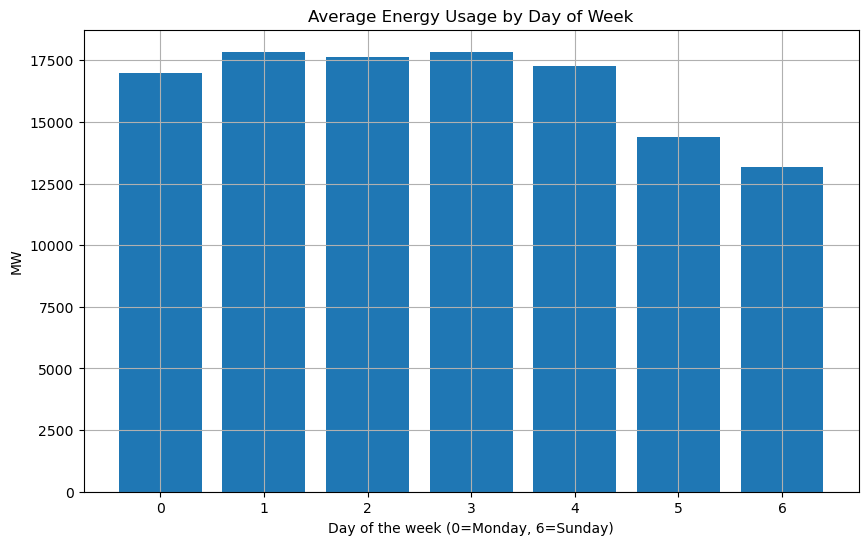

In [158]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(days_usage.index, days_usage["AEP_MW"])
ax.set(title="Average Energy Usage by Day of Week",
      xlabel="Day of the week (0=Monday, 6=Sunday)",
      ylabel="MW")
ax.grid(True)

## Average Energy Usage by Day of the Week
This plot shows how energy consumption varies across the days of the week. It can reveal weekly patterns, such as reduced usage on weekends or higher demand during workdays.

### Observations

Average Energy Usage by Day of Week

- **Weekdays (Monday to Friday)** show consistently **higher energy usage**, peaking around **17,000–18,000 MW**.
- **Tuesday (Day 1)** records the **highest average usage**, almost at 18,000 MW.
- **Saturday (Day 5)** shows a **notable drop**, with usage falling to around **14,500 MW**.
- **Sunday (Day 6)** has the **lowest energy usage**, approximately **13,000 MW**.
- This pattern suggests that **energy demand is strongly correlated with typical workdays**, decreasing significantly on weekends.
---

In [159]:
monthly_usage = pd.DataFrame(monthly_usage,
                            columns=['AEP_MW'])
monthly_usage

,AEP_MW
monthly,
1,19457.556948
2,19255.711111
3,16208.348993
4,12566.755208
5,12643.347407
6,16980.223069
7,18527.546483
8,19141.291191
9,14782.602637


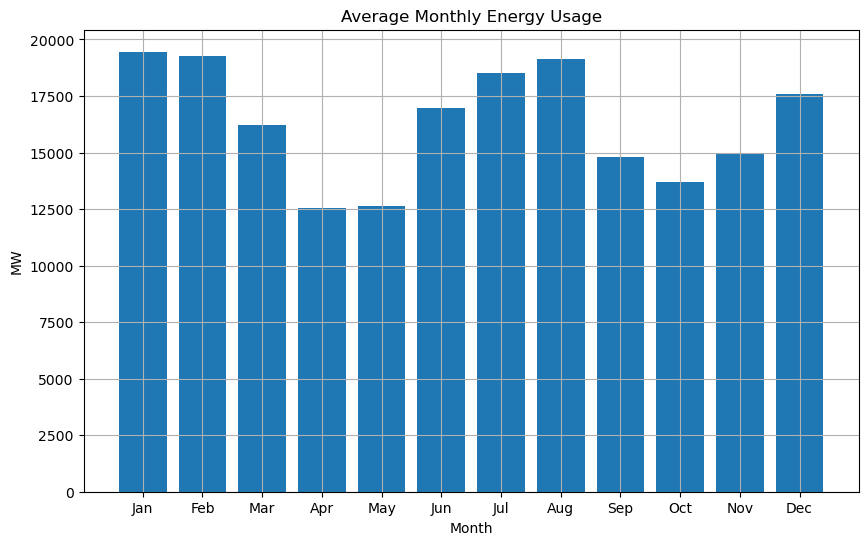

In [160]:
import calendar

monthly_usage.index = [calendar.month_abbr[i] for i in monthly_usage.index]
fig, ax = plt.subplots(figsize=(10, 6))

bar = ax.bar(monthly_usage.index, monthly_usage["AEP_MW"])
ax.set(title="Average Monthly Energy Usage",
      xlabel="Month",
      ylabel="MW")
ax.grid(True)


## Average Monthly Energy Usage
This bar plot illustrates how energy usage changes across different months. It highlights seasonal trends, such as increased usage during summer or winter months due to heating or cooling.

### Observations

Average Monthly Energy Usage:

- **January** and **February** have the **highest energy usage**, both nearing **19,500 MW**.
- **March** and **June to August** also show **high usage**, with **August** nearly matching the winter peak.
- The **lowest energy usage** occurs in **April and May**, both averaging around **12,500 MW**.
- Another dip is noticeable in **September and October**, before usage climbs again toward the end of the year.
- This trend suggests **seasonal influence**, likely driven by:
  - **Winter heating demand** (Jan–Feb, Dec)
  - **Summer cooling demand** (Jul–Aug)
  - **Lower usage in spring and fall** due to milder weather conditions.
---

In [161]:
yearly_usage = pd.DataFrame(yearly_usage,
                           columns=["AEP_MW"])
yearly_usage

,AEP_MW
year,
2004,15179.383962
2005,16173.410448
2006,16314.953981
2007,18903.000000
2008,19055.301205
2009,14522.488055
2010,17790.194915
2011,19153.435780
2012,15621.017241


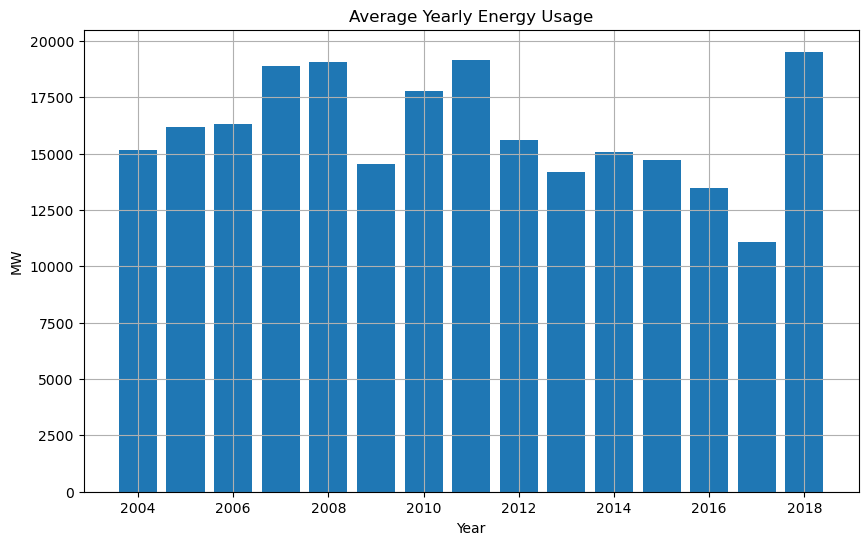

In [162]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(yearly_usage.index, yearly_usage["AEP_MW"])
ax.set(title="Average Yearly Energy Usage",
      xlabel="Year",
      ylabel="MW")
ax.grid(True)

## Average Yearly Energy Usage
This plot shows the average energy consumption per year. It helps to detect long-term changes in demand, such as increases due to population growth or decreases due to efficiency improvements.

### Observations

Average Yearly Energy Usage:

- The highest energy usage occurred in **2018**, nearing **20,000 MW**.
- **2007, 2008, and 2011** also show **peak levels**, with values around **19,000 MW**.
- A significant **decline** is observed after **2011**, particularly from **2014 to 2017**, where usage drops steadily.
  - The **lowest point** is in **2017**, with average usage falling close to **11,000 MW**.
- The chart shows a **notable recovery in 2018**, reversing the downward trend from previous years.
- **2009** and **2013** reflect sharp dips compared to their immediate preceding years, suggesting potential anomalies or external influencing factors (e.g., economic, policy, or climate conditions).
---

# Conclusion

This exploratory data analysis of hourly energy consumption reveals several meaningful patterns that can inform energy management strategies and operational planning:

- **Consistent Daily Patterns:** Energy demand typically **increases throughout the day**, peaking between **15:00 and 20:00**, reflecting residential and commercial activity levels.
  
- **Workweek Trends:** Usage is **highest on weekdays**, especially **Tuesdays**, and **drops significantly during weekends**, with **Sunday showing the lowest demand**. This emphasizes a clear link between energy usage and work routines.

- **Seasonal Variations:** There is a **dual peak in energy usage during winter and summer months** (e.g., **January, February, and August**), likely due to heating and cooling needs. In contrast, **spring and fall** see reduced demand, corresponding to milder temperatures.

- **Long-Term Fluctuations:** Yearly data highlights **fluctuating trends** in energy usage. A **downward trend from 2011 to 2017** could indicate economic slowdowns, increased efficiency, or policy changes, followed by a **sharp rebound in 2018**.

---

## Key Takeaways:

- **Peak load planning** should consider daily and seasonal usage spikes to ensure grid stability.
- **Energy-saving initiatives** may be most effective when targeted at high-demand weekday hours.
- **Anomalies or dips in usage** (e.g., 2009, 2013, 2017) warrant deeper investigation into external factors.

This analysis lays the groundwork for further studies such as forecasting, anomaly detection, or demand response modeling. Future work could also integrate weather data, economic indicators, or policy changes for more advanced insights.